# 1. Linear Regression #

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
np.random.seed(0)
m = 100
X = np.linspace(0, 10, m).reshape(m, 1)
y = X + np.random.randn(m, 1)

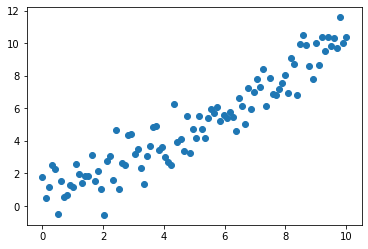

In [6]:
plt.scatter(X, y)

In [7]:
from sklearn.linear_model import LinearRegression

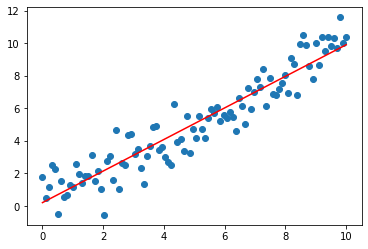

In [8]:
model = LinearRegression()
model.fit(X, y)
model.score(X, y)

predictions = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predictions, c = "red")

In [9]:
np.random.seed(0)
m = 100
X = np.linspace(0, 10, m).reshape(m, 1)
y = X**2 + np.random.randn(m, 1)

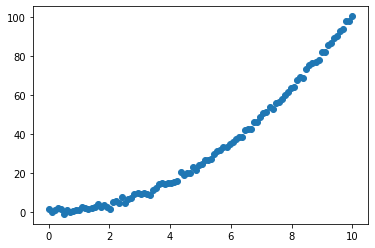

In [10]:
plt.scatter(X, y)

In [11]:
from sklearn.svm import SVR

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Anaconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


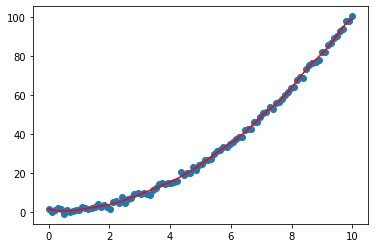

In [12]:
model = SVR(C = 100)
model.fit(X, y)
model.score(X, y)

predictions = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predictions, c = "red")

# 2. Classification #

In [13]:
import pandas as pd
import seaborn as sns

In [14]:
titanic = sns.load_dataset("titanic")
titanic.shape
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
titanic = titanic[["survived", "pclass", "sex", "age"]]
titanic.dropna(axis = 0, inplace = True)
titanic["sex"].replace(["male", "female"], [0, 1], inplace = True)
titanic.head()

,survived,pclass,sex,age
0,0,3,0,22.0
1,1,1,1,38.0
2,1,3,1,26.0
3,1,1,1,35.0
4,0,3,0,35.0


In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
model = KNeighborsClassifier()

In [18]:
y = titanic["survived"]
X = titanic.drop("survived", axis = 1)

In [19]:
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: survived, Length: 714, dtype: int64

In [20]:
X

,pclass,sex,age
0,3,0,22.0
1,1,1,38.0
2,3,1,26.0
3,1,1,35.0
4,3,0,35.0
...,...,...,...
885,3,1,39.0
886,2,0,27.0
887,1,1,19.0
889,1,0,26.0


In [21]:
model.fit(X, y)
model.score(X, y)

0.8319327731092437

In [22]:
def survie(model, pclass = 3, sex = 0, age = 21):
    x = np.array([pclass, sex, age]).reshape(1, 3)
    print(model.predict(x))
    print(model.predict_proba(x))

In [23]:
survie(model)

[0]
[[0.8 0.2]]


2


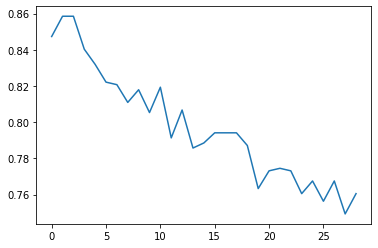

In [24]:
score = []
best_score = 0
best_k = 0

for i in range(1, 30):    
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X, y)
    score.append(model.score(X, y))
    
    if model.score(X, y) > best_score:
        best_score = model.score(X, y)
        best_k = i

print(best_k)
plt.plot(score)

# 3. Train vs Test #

In [25]:
from sklearn.datasets import load_iris

(150, 4)


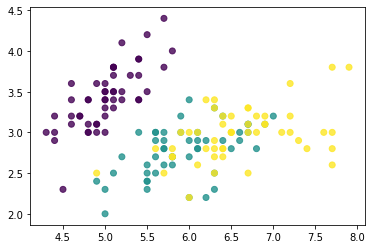

In [26]:
iris = load_iris()

X = iris.data
y = iris.target

print(X.shape)
plt.scatter(X[:, 0], X[:, 1], c = y, alpha = 0.8)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

print("Train set : ", X_train.shape)
print("Test set : ", X_test.shape)

Train set :  (120, 4)
Test set :  (30, 4)


Text(0.5, 1.0, 'Test set')

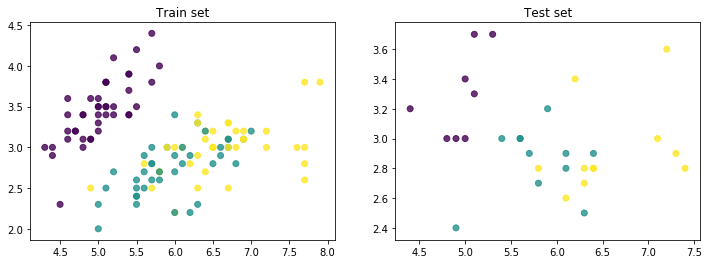

In [29]:
plt.figure(figsize = (12,4))
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c = y_train, alpha = 0.8)
plt.title("Train set")
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1], c = y_test, alpha = 0.8)
plt.title("Test set")

In [30]:
model = KNeighborsClassifier(n_neighbors = 1)

model.fit(X_train, y_train)
print("Train score : ", model.score(X_train, y_train))
print("Test score : ", model.score(X_test, y_test))

Train score :  1.0
Test score :  0.9


# 4. Cross-Validation #

In [31]:
model = KNeighborsClassifier(n_neighbors = 4)

model.fit(X_train, y_train)
print("Train score : ", model.score(X_train, y_train))
print("Test score : ", model.score(X_test, y_test))

Train score :  0.975
Test score :  0.9333333333333333


In [32]:
model = KNeighborsClassifier(n_neighbors = 6)

model.fit(X_train, y_train)
print("Train score : ", model.score(X_train, y_train))
print("Test score : ", model.score(X_test, y_test))

Train score :  0.9833333333333333
Test score :  0.9666666666666667


In [33]:
from sklearn.model_selection import cross_val_score

In [34]:
cross_val_score(KNeighborsClassifier(4), X_train, y_train, cv = 5, scoring = "accuracy").mean()

0.9662424242424243

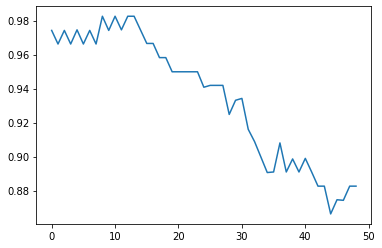

In [35]:
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv = 5, scoring = "accuracy").mean()
    val_score.append(score)
plt.plot(val_score)

In [36]:
from sklearn.model_selection import validation_curve

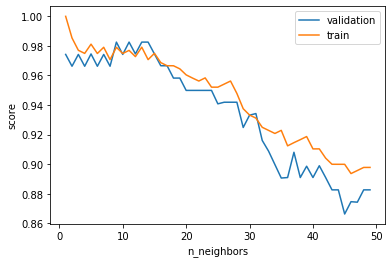

In [37]:
model = KNeighborsClassifier()
k = np.arange(1, 50)

train_score, val_score = validation_curve(model, X_train, y_train, "n_neighbors", k, cv = 5)

plt.plot(k, val_score.mean(axis = 1), label = "validation")
plt.plot(k, train_score.mean(axis = 1), label = "train")

plt.ylabel("score")
plt.xlabel("n_neighbors")
plt.legend()

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
param_grid = {
    "n_neighbors" : np.arange(1, 20),
    "metric" : ["euclidean", "manhattan"]
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)

grid.fit(X_train, y_train)

D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [40]:
grid.best_score_

0.9833333333333333

In [41]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 9}

In [42]:
model = grid.best_estimator_

In [43]:
model.score(X_test, y_test)

0.9666666666666667

In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
confusion_matrix(y_test, model.predict(X_test))

array([[ 8,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 11]], dtype=int64)

# 5. Courbe d'apprentissage #

In [46]:
from sklearn.model_selection import learning_curve

[19 38 57 76 95]


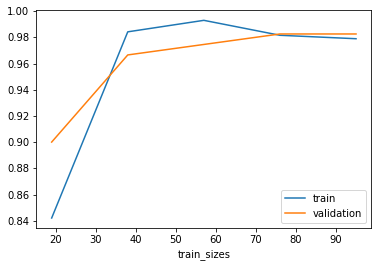

In [47]:
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes = np.linspace(0.2, 1.0, 5), cv = 5)

print(N)
plt.plot(N, train_score.mean(axis = 1), label = "train")
plt.plot(N, val_score.mean(axis = 1), label = "validation")
plt.xlabel("train_sizes")
plt.legend()

In [48]:
# exercice titanic

# 1/ Créer train set et test set, entraîner puis évaluer
# 2/ Avec GridSearch, trouver meilleurs hyperp n_neighbors, metrics et weights
# 3/ Est-ce que collecter plus de données est utile ?

In [49]:
# 1/

y = titanic["survived"]
X = titanic.drop("survived", axis = 1)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 5)

print("Train set : ", X_train.shape)
print("Test set : ", X_test.shape)

Train set :  (571, 3)
Test set :  (143, 3)


In [51]:
model = KNeighborsClassifier(n_neighbors = 1)

model.fit(X_train, y_train)
print("Train score : ", model.score(X_train, y_train))
print("Test score : ", model.score(X_test, y_test))

Train score :  0.8756567425569177
Test score :  0.7972027972027972


In [52]:
# 2/

param_grid = {
    "n_neighbors" : np.arange(1, 20),
    "metric" : ["euclidean", "manhattan"],
    "weights" : ["uniform", "distance"]
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv = 5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [53]:
grid.best_score_

0.7828371278458844

In [54]:
grid.best_params_

{'metric': 'manhattan', 'n_neighbors': 17, 'weights': 'distance'}

[ 91 182 273 364 456]


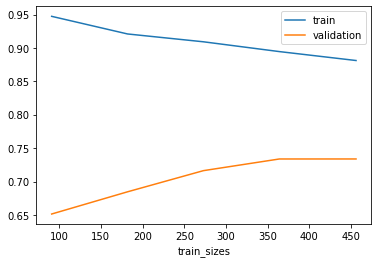

In [55]:
# 3/

N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes = np.linspace(0.2, 1.0, 5), cv = 5)

print(N)
plt.plot(N, train_score.mean(axis = 1), label = "train")
plt.plot(N, val_score.mean(axis = 1), label = "validation")
plt.xlabel("train_sizes")
plt.legend()

In [56]:
# On a besoin de plus de données !

# 6. Techniques de Cross-Validation #

In [57]:
iris = load_iris()
X = iris.data
y = iris.target

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, LeaveOneOut, ShuffleSplit, StratifiedKFold, GroupKFold

In [61]:
cv = KFold(5, random_state = 0)
cross_val_score(KNeighborsClassifier(), X, y, cv = cv)

array([1.        , 1.        , 0.83333333, 0.93333333, 0.8       ])

In [63]:
cv = LeaveOneOut()
cross_val_score(KNeighborsClassifier(), X, y, cv = cv)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [66]:
cv = ShuffleSplit(4, test_size = 0.2)
cross_val_score(KNeighborsClassifier(), X, y, cv = cv)

array([1.        , 0.96666667, 0.93333333, 0.96666667])

In [69]:
cv = StratifiedKFold(4)
cross_val_score(KNeighborsClassifier(), X, y, cv = cv)

array([0.97435897, 0.94871795, 0.94444444, 1.        ])

In [71]:
cv = GroupKFold(5).split(X, y, groups = X[:, 0])
cross_val_score(KNeighborsClassifier(), X, y, cv = cv)

array([0.93333333, 1.        , 0.96666667, 0.96666667, 1.        ])